# Preprocessing phase

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from source.utils.dataHandler import DataHandler

In [2]:
data_handler = DataHandler('../data/export.csv')

/Users/daniele/Documents/Università/terzoAnno/primoSemestre/SocialMediaDataAnalysis/Progetto/ShopSmart/source/utils/dataHandler.py:24: DtypeWarning: Columns (12,22) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(filepath)


In [3]:
data_handler.preprocess_data()

In [4]:
tmp = data_handler.get_data()

In [5]:
tmp

,db_sc,id_sc,pv,data,cassa,cassiere,num_scontrino,ora,tessera,t_flag,...,liv4,descr_liv4,liv5,descr_liv5,liv6,descr_liv6,tipologia,descr_tipologia,cod_rep,descr_rep
0,sysevo,52597225,4653,2023-03-25,2,2,248,21:08:00,NaN,V,...,02070201,ARANCIATA ZUCCHERO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
1,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,01180203,PARZIALMENTE SCREMATO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
2,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,05040402,VASCHETTE,NaN,NaN,NaN,NaN,NO,Prodotti Normali,005,CURA CASA
3,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,03080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,003,BANCO LIBERO SERVIZIO
4,sysevo,52597232,4542,2023-03-25,1,1,581,21:00:00,2.484252e+11,V,...,03080203,PASTA SFOGLIA,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,003,BANCO LIBERO SERVIZIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682403,sysevo,62228224,4542,2023-09-30,5,5,375,21:10:00,NaN,V,...,01030201,MAIS/FORMAGGIO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
9682404,sysevo,62228224,4542,2023-09-30,5,5,375,21:10:00,NaN,V,...,01030201,MAIS/FORMAGGIO,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE
9682405,sysevo,62228225,4542,2023-09-30,3,3,303,21:12:00,2.484252e+11,V,...,01050101,STANDARD,NaN,NaN,NaN,NaN,PM,Prodotti a Marchio Coop,001,ALIMENTARE
9682406,sysevo,62228225,4542,2023-09-30,3,3,303,21:12:00,2.484252e+11,V,...,01010402,FROLLINI ARRICCHITI,NaN,NaN,NaN,NaN,NO,Prodotti Normali,001,ALIMENTARE


Which quarter do you prefer?

You have the following choices:
- Gen-Mar
- Apr-Giu
- Lug-Set
- Ott-Dic

In [6]:
quarter = 'Gen-Mar'

data_handler.filter_month(quarter)

Dataframe filtered by quarter: Gen-Mar


For the implementation of a recommendation system, we must know who is the client.

The only feature that provides this information is tessera, but the number of fidelity customers is very low

You can select chose between fidelity’s number and receipt’s code to index the recommendation system

In [7]:
index = 'tessera' # or index = 'id_sc'
df = data_handler.process(index, 'liv3', 'descr_liv3')

Original Descriptive Statistics:
count    163224.000000
mean          3.016909
std           4.639116
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         229.000000
Name: value, dtype: float64


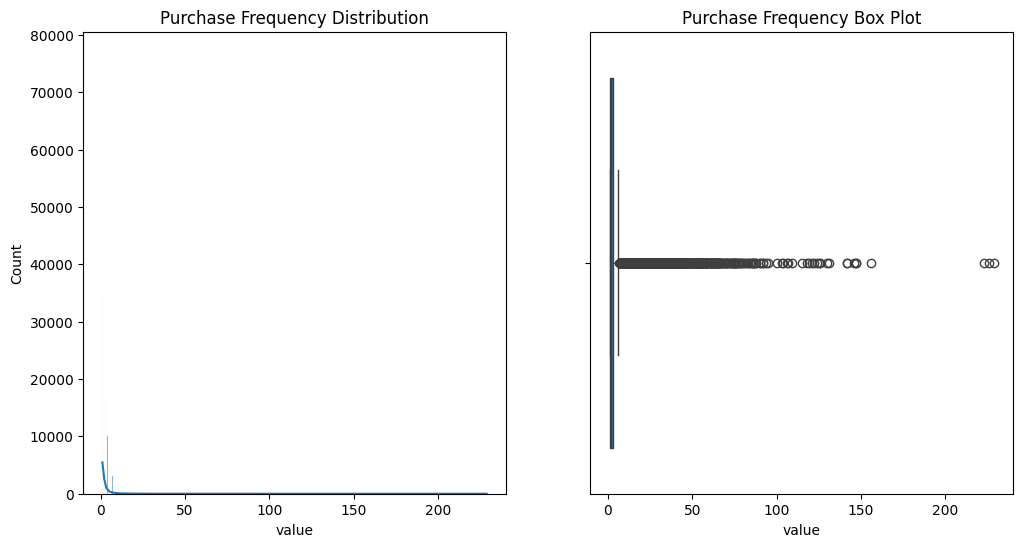

In [8]:
data_handler.descriptiveStats(df)

In [9]:
df = data_handler.process(index, 'liv3', 'descr_liv3', 100)

Original Descriptive Statistics:
count    163200.000000
mean          1.181547
std           0.392510
min           1.000000
25%           1.000000
50%           1.090909
75%           1.181818
max          10.000000
Name: value, dtype: float64


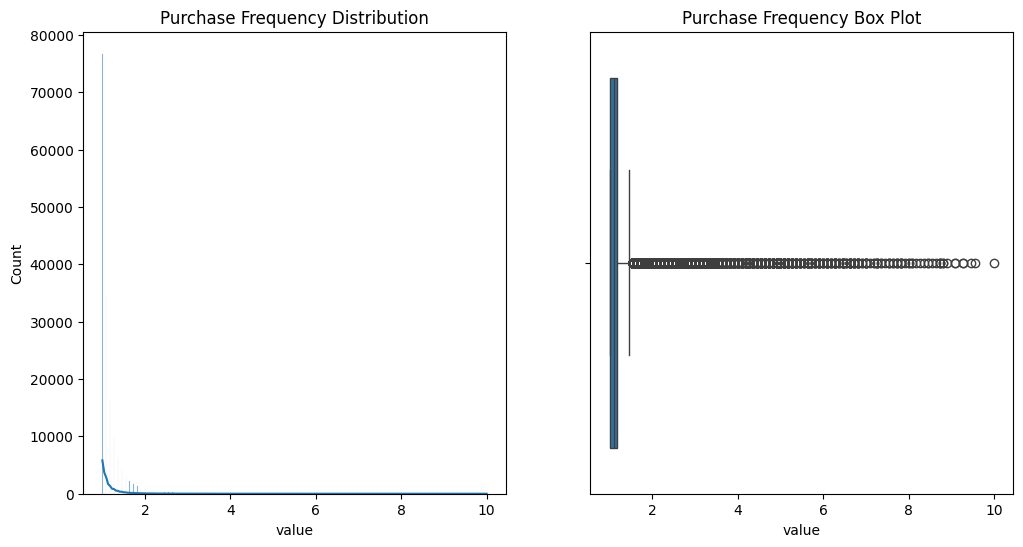

In [10]:
df_MinMaxNorm_1_10 = data_handler.minMax_normalization_1_10(df)
data_handler.descriptiveStats(df_MinMaxNorm_1_10)

In [11]:
data_handler.split_and_save_data(df_MinMaxNorm_1_10, '../data/', 0.25)